In [16]:
%matplotlib inline
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt
import re

In [17]:
def bgr_to_rgb(img):
    b,g,r = cv2.split(img)
    return cv2.merge([r,g,b])

In [25]:
def get_label(file: str, labels: dict):
    match = re.search('[a-z]+', file).group(0)
    return labels[match]

In [30]:
def load_all_imgs(path, dict_label, img_size, mode):
    
    imgs = []
    labels = []
    files = os.listdir(path)
    files.sort()
    print(f'\n{path} found {len(files)} img to load')
    for index, file in enumerate(files):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, mode)
        
        if mode == 0:
            img = np.expand_dims(img, 2)
            
        img = bgr_to_rgb(img)
        img = cv2.resize(img, img_size)
        img = (img / 127.5) - 1.
        imgs.append(img)
        labels.append(get_label(file, dict_label))
        if index % 100 == 0:
            print(f'\n[{index}]:', end='')
        else:
            print("|", end='')
    return np.array(imgs), np.array(labels)

In [36]:
labels = {'healthy': 0, 'mild': 1, 'moderate': 2, 'severe': 3}

imgs, labels = load_all_imgs('../dataset/dataset_64x64', labels, (64,64), mode=1)


../dataset/dataset_64x64 found 6194 img to load

[0]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[100]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[200]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[300]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[400]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[500]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[600]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[700]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[800]:||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [39]:
imgs.shape

(6194, 64, 64, 3)

In [38]:
labels.shape

(6194,)

In [40]:
labels[2500]

1

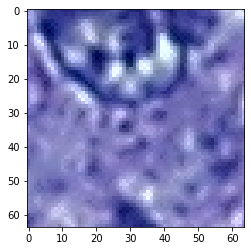

In [41]:
plt.imshow((imgs[2500] + 1) / 2.0)

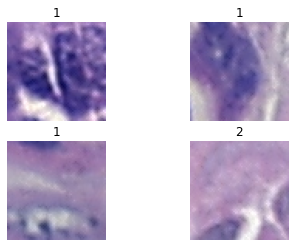

In [46]:
idx = np.random.randint(0, imgs.shape[0], 16)

img, label = imgs[idx], labels[idx]

fig, axs = plt.subplots(2, 2)
cnt = 0
for i in range(2):
    for j in range(2):
        # Output a grid of images
        examples = (img[cnt] + 1) / 2.0
        axs[i, j].imshow(examples)
        axs[i, j].axis('off')
        axs[i, j].set_title(f"{label[cnt]}")
        cnt += 1